In [115]:
import time
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
import statistics
from scipy.optimize import *

In [58]:
global eps
eps = 0.001

# Task 1

In [429]:
# ((b - a) / eps) iterations and f-calculations (1000, 1000, 990)
# The implementation of exhaustive search
def exhaustive_search(function, a, b):
    i = 1
    # Calculate the number of iterationsd
    n = (b - a) / eps
    k = 0
    x = a + k * ((b - a) / n)
    f = function(x)
    minimum = f
    xm = x
    print(i, xm, minimum)
    # Iterate through the possible options
    for k in np.arange(1,n):
        x = a + k * ((b - a) / n)
        f = function(x)
        
        # Detect the minimum
        if f < minimum:
            minimum = f
            xm = x
        i += 1
    return xm, i

In [430]:
exhaustive_search(cubic_func, 0, 1)

1 0.0 0.0


(0.0, 1000)

In [431]:
exhaustive_search(abs_func, 0, 1)

1 0.0 0.2


(0.2, 1000)

In [432]:
exhaustive_search(sin_func, 0.01, 1)

1 0.01 -0.005063656411097588


(0.223, 990)

In [5]:
# 11 iteraions ; 2 + 22 = 24 f-calculations
# The implementation of Dichotomy search
def dichotomy_search(function, a, b, sigma=eps/2):
    x1 = (a + b - sigma)/2
    x2 = (a + b + sigma)/2
    i = 0
    while abs(a - b) >= eps:
        i += 1
        # Compare two f(x) and move the boarders
        if function(x1) <= function(x2):
            b = x2
        else:
            a = x1
        # Calculate the new points
        x1 = (a + b - sigma)/2
        x2 = (a + b + sigma)/2
        print(i, a, b)
    return a if function(a) < function(b) else b

In [6]:
# 15 iterations ; 2 + 2 + 15 = 19 f-calculations
# The implementation of Golden Section search
def golden_section_search(function, a, b):
    # At the first step calculate two points
    x1 = a + ((3 - pow(5, 0.5)) / 2) * (b - a)
    f1 = function(x1)
    x2 = b + ((-3 + pow(5, 0.5)) / 2) * (b - a)
    f2 = function(x2)
    i = 0
    while abs(a - b) >= eps:
        i += 1
        # In order to f(x) calculate only one point
        if f1 <= f2:
            b, x2 = x2, x1
            x1 = a + ((3 - pow(5, 0.5)) / 2) * (b - a)
            f2 = f1
            f1 = function(x1)
        else:
            a, x1 = x1, x2
            x2 = b + ((-3 + pow(5, 0.5)) / 2) * (b - a)
            f1 = f2
            f2 = function(x2)
        print(i, a, b)
    return a if function(a) < function(b) else b

In [7]:
# The inplementation of functions from the task
def cubic_func(x):
    return pow(x, 3)

In [8]:
def abs_func(x):
    return abs(x - 0.2)

In [9]:
def sin_func(x):
    return x * np.sin(1/x)

In [134]:
golden_section_search(cubic_func, 0, 1)

1 0 0.6180339887498949
2 0 0.3819660112501051
3 0 0.2360679774997897
4 0 0.1458980337503154
5 0 0.09016994374947422
6 0 0.05572809000084119
7 0 0.03444185374863301
8 0 0.021286236252208175
9 0 0.013155617496424831
10 0 0.008130618755783343
11 0 0.005024998740641487
12 0 0.003105620015141856
13 0 0.00191937872549963
14 0 0.0011862412896422258
15 0 0.000733137435857404


0

In [133]:
golden_section_search(abs_func, 0, 1)

1 0 0.6180339887498949
2 0 0.3819660112501051
3 0.1458980337503154 0.3819660112501051
4 0.1458980337503154 0.29179606750063086
5 0.1458980337503154 0.2360679774997897
6 0.18033988749894844 0.2360679774997897
7 0.18033988749894844 0.21478174124758148
8 0.1934955049953733 0.21478174124758148
9 0.1934955049953733 0.20665112249179812
10 0.1934955049953733 0.20162612375115663
11 0.19660112501051516 0.20162612375115663
12 0.1985205037360148 0.20162612375115663
13 0.1985205037360148 0.2004398824615144
14 0.1992536411718722 0.2004398824615144
15 0.199706745025657 0.2004398824615144


0.199706745025657

In [135]:
golden_section_search(sin_func, 0.01, 1)

1 0.01 0.621853648862396
2 0.01 0.38814635113760404
3 0.15443905341281225 0.38814635113760404
4 0.15443905341281225 0.29887810682562455
5 0.15443905341281225 0.24370729772479183
6 0.18853648862395897 0.24370729772479183
7 0.20960986251364505 0.24370729772479183
8 0.20960986251364505 0.23068323640333122
9 0.21765917508187058 0.23068323640333122
10 0.21765917508187058 0.22570848765009613
11 0.22073373889686104 0.22570848765009613
12 0.22073373889686104 0.22380830271185148
13 0.22190811777360683 0.22380830271185148
14 0.22190811777360683 0.22308249665035265
15 0.22235669058885382 0.22308249665035265


0.22235669058885382

In [88]:
dichotomy_search(cubic_func, 0, 1)

1 0 0.50025
2 0 0.25037499999999996
3 0 0.12543749999999998
4 0 0.06296874999999999
5 0 0.031734374999999995
6 0 0.016117187499999998
7 0 0.00830859375
8 0 0.004404296875
9 0 0.0024521484375
10 0 0.00147607421875
11 0 0.0009880371093750001


0

In [89]:
dichotomy_search(abs_func, 0, 1)

1 0 0.50025
2 0 0.25037499999999996
3 0.12493749999999998 0.25037499999999996
4 0.18740624999999997 0.25037499999999996
5 0.18740624999999997 0.21914062499999995
6 0.18740624999999997 0.20352343749999996
7 0.19521484374999995 0.20352343749999996
8 0.19911914062499994 0.20352343749999996
9 0.19911914062499994 0.20157128906249996
10 0.19911914062499994 0.20059521484374995
11 0.19960717773437495 0.20059521484374995


0.19960717773437495

In [90]:
dichotomy_search(sin_func, 0.01, 1)

1 0.01 0.50525
2 0.01 0.25787499999999997
3 0.1336875 0.25787499999999997
4 0.19553124999999996 0.25787499999999997
5 0.19553124999999996 0.22695312499999995
6 0.21099218749999996 0.22695312499999995
7 0.21872265624999995 0.22695312499999995
8 0.21872265624999995 0.22308789062499995
9 0.22065527343749994 0.22308789062499995
10 0.22162158203124996 0.22308789062499995
11 0.22210473632812497 0.22308789062499995


0.22210473632812497

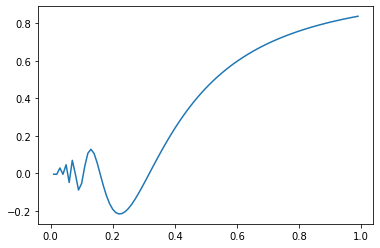

In [86]:
# Plot for x*sin(1/x) function to show the minimum point
X = np.arange(0.01,1,0.01)
plt.plot(X, sin_func(X))

# Task 2

In [67]:
# Generate alpha and beta numbers in range (0,1)
alpha = random.uniform(0.0000000000000000001,0.9999999999999999999)
beta = random.uniform(0.0000000000000000001,0.9999999999999999999)

In [187]:
# The function ot generate our data to approximate (X, Y) with some noize 
def generate_data(k, alpha, beta):
    X = [x/100 for x in range(0,k)]
    noizes = np.random.normal(0,1,100)
    Y = [alpha * x + beta + noize for x, noise in zip(X, noizes)]
    return X, Y

In [188]:
# Linear function for approximation
def linear(x, a, b):
    return a * x + b

In [189]:
# Rational function for approximation
def rational(x, a, b):
    return a / (1 + b * x)

In [323]:
# Generate 100 points and values of function for them with noize
X, Y = generate_data(100, alpha, beta)

In [372]:
# The function for calculating the means least squares which we minimize with multi-dimensions direct methods
def loss(x, function):
    sum = 0
    for i in range(100):
        sum += (function(X[i], x[0], x[1]) - Y[i])**2
    return sum

In [359]:
# The same but for Gauss method
def loss_for_gauss(x1, x2, function, direct_order=True):
    if direct_order:
        sum = 0
        for i in range(100):
            sum += (function(X[i], x1, x2) - Y[i])**2
        return sum
    else:
        sum = 0
        for i in range(100):
            sum += (function(X[i], x2, x1) - Y[i])**2
        return sum

## Linear approximation

In [419]:
# Initial point for a,b which we define by minimizing the function of loss()
x0 = (0,0)

# Minimizing by Nelder-Mead method
nelder_mead = minimize(loss, x0, method='Nelder-Mead', args=(linear), tol=eps)

a_nelder_mead, b_nelder_mead = nelder_mead.x
a_nelder_mead, b_nelder_mead

(-0.28877241379038154, 0.648736129494992)

In [420]:
nelder_mead

 final_simplex: (array([[-0.28877241,  0.64873613],
       [-0.28810285,  0.64833478],
       [-0.28807326,  0.64850374]]), array([134.31548943, 134.31549189, 134.31549253]))
           fun: 134.31548942876856
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 53
        status: 0
       success: True
             x: array([-0.28877241,  0.64873613])

In [374]:
# Minimizing by Brute-Force method
brute_force = brute(loss, ranges=(slice(0,1,eps), slice(0,1,eps)), args=(linear, ))

a_brute_force, b_brute_force = brute_force
a_brute_force, b_brute_force

(-0.2885977931265784, 0.6486399310165128)

In [425]:
# The implemetation of Gauss method 
def gauss_method(function, approx_function, x0):
    x1, x2 = x0
    # Lists for saving last two results of x1/x2 to define if we can stop calculations 
    latest_x1 = [x1, x1]
    latest_x2 = [x2, x2]
    nit = 0
    nfev = 0
    condition1 = condition2 = True
    while condition1 and condition2:
        if condition1:
            # Find not fixed variable by minimizing with Nelder-Mead method
            x1_min = minimize(function, x1, method='Nelder-Mead', args=(x2, approx_function))
            nit += x1_min.nit
            nfev += x1_min.nfev
            x1 = x1_min.x[0]
            latest_x1[0], latest_x1[1] = latest_x1[1], x1

        if condition2:
            x2_min = minimize(function, x2, method='Nelder-Mead', args=(x1, approx_function, False))
            nit += x2_min.nit
            nfev += x2_min.nfev
            x2 = x2_min.x[0]
            latest_x2[0], latest_x2[1] = latest_x2[1], x2
        
        # Condition if we find the x1
        condition1 = abs(latest_x1[1] - latest_x1[0]) >= eps
        # Condition if we find the x2
        condition2 = abs(latest_x2[1] - latest_x2[0]) >= eps
    
    if loss_for_gauss(latest_x1[0], latest_x2[0], approx_function) < loss_for_gauss(latest_x1[1], latest_x2[1], approx_function):
        return latest_x1[0], latest_x2[0]
    else:
        return latest_x1[1], latest_x2[1], nit, nfev

In [428]:
# Minimizing by Gauss method
a_gauss, b_gauss, nit, nfev = gauss_method(loss_for_gauss, linear, x0)
a_gauss, b_gauss, nit, nfev

(-0.28358545079243214, 0.6462006129735953, 422, 844)

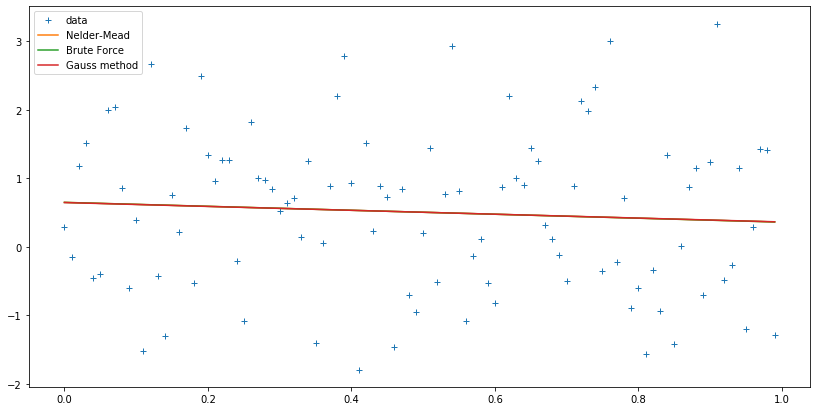

In [354]:
# Show the results of approximation
plt.figure(figsize=(14, 7))
plt.plot(X, Y, '+', label='data')

Y_nelder_mead = [linear(x, a_nelder_mead, b_nelder_mead) for x in X]
plt.plot(X, Y_nelder_mead, label='Nelder-Mead')

Y_brute_force = [linear(x, a_brute_force, b_brute_force) for x in X]
plt.plot(X, Y_brute_force, label='Brute Force')

Y_gauss = [linear(x, a_gauss, b_gauss) for x in X]
plt.plot(X, Y_gauss, label='Gauss method')

plt.legend()

## Rational approximation

In [434]:
x0 = (0,0)
nelder_mead = minimize(loss, x0, method='Nelder-Mead', args=(rational), tol=eps)

a_nelder_mead, b_nelder_mead = nelder_mead.x
a_nelder_mead, b_nelder_mead

(0.648917780504138, 0.6161279427617552)

In [435]:
nelder_mead

 final_simplex: (array([[0.64891778, 0.61612794],
       [0.64878717, 0.61647045],
       [0.64851403, 0.61527265]]), array([134.41606173, 134.41606184, 134.41606223]))
           fun: 134.41606172757037
       message: 'Optimization terminated successfully.'
          nfev: 117
           nit: 63
        status: 0
       success: True
             x: array([0.64891778, 0.61612794])

In [375]:
brute_force = brute(loss, ranges=(slice(0,1,eps), slice(0,1,eps)), args=(rational, ))

a_brute_force, b_brute_force = brute_force
a_brute_force, b_brute_force

(0.6487591738080198, 0.615864336934485)

In [437]:
a_gauss, b_gauss, nit, nfev  = gauss_method(loss_for_gauss, rational, x0)
a_gauss, b_gauss, nit, nfev

(0.6468988335212928, 0.6092126937862024, 309, 618)

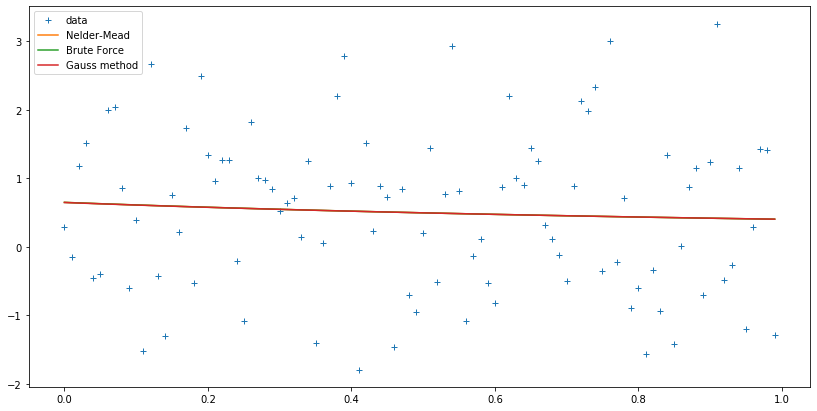

In [385]:
plt.figure(figsize=(14, 7))
plt.plot(X, Y, '+', label='data')

Y_nelder_mead = [rational(x, a_nelder_mead, b_nelder_mead) for x in X]
plt.plot(X, Y_nelder_mead, label='Nelder-Mead')

Y_brute_force = [rational(x, a_brute_force, b_brute_force) for x in X]
plt.plot(X, Y_brute_force, label='Brute Force')

Y_gauss = [rational(x, a_gauss, b_gauss) for x in X]
plt.plot(X, Y_gauss, label='Gauss method')

plt.legend()